In [1]:
%matplotlib inline
import tensorflow as tf

In [2]:
# !kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection -p ./data

# import zipfile

# with zipfile.ZipFile('./data/news-headlines-dataset-for-sarcasm-detection.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data')

In [3]:
import json

with open('./data/Sarcasm_Headlines_Dataset.json', 'r') as f:
    lines = f.readlines()
    
records = [json.loads(line) for line in lines]
sentences = [record['headline'] for record in records]
labels = [record['is_sarcastic'] for record in records]

In [4]:
TRAIN_SIZE = 20000
VOCAB_SIZE = 1000
OOV_TOKEN = '<OOV>'
MAX_LEN = 120
PADDING = 'post'
TRUNCATING = 'post'
EMBEDDING_DIM = 16
NUM_EPOCH = 10

In [5]:
train_sentences = sentences[:TRAIN_SIZE]
train_labels = labels[:TRAIN_SIZE]

test_sentences = sentences[TRAIN_SIZE:]
test_labels = labels[TRAIN_SIZE:]

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_sequences = pad_sequences(train_sequences, maxlen=MAX_LEN, padding=PADDING, truncating=TRUNCATING)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences = pad_sequences(test_sequences, maxlen=MAX_LEN, padding=PADDING, truncating=TRUNCATING)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalAveragePooling1D, Dense

model = Sequential([
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN),
    Conv1D(128, 5, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_sequences, train_labels, epochs=NUM_EPOCH, 
                    validation_data=(test_sequences, test_labels), verbose=1)

W0813 13:04:06.522467 13120 deprecation.py:323] From d:\Dev\Miniconda3\envs\tf\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 4s 203us/sample - loss: 0.5510 - accuracy: 0.7056 - val_loss: 0.4485 - val_accuracy: 0.7876
Epoch 2/10
20000/20000 [==============================] - 4s 205us/sample - loss: 0.4040 - accuracy: 0.8111 - val_loss: 0.4154 - val_accuracy: 0.8050
Epoch 3/10
20000/20000 [==============================] - 4s 202us/sample - loss: 0.3702 - accuracy: 0.8314 - val_loss: 0.3994 - val_accuracy: 0.8174
Epoch 4/10
20000/20000 [==============================] - 4s 200us/sample - loss: 0.3506 - accuracy: 0.8415 - val_loss: 0.3938 - val_accuracy: 0.8223
Epoch 5/10
20000/20000 [==============================] - 4s 206us/sample - loss: 0.3346 - accuracy: 0.8512 - val_loss: 0.3891 - val_accuracy: 0.8256
Epoch 6/10
20000/20000 [==============================] - 4s 197us/sample - loss: 0.3224 - accuracy: 0.8543 - val_loss: 0.3933 - val_accuracy: 0.8240
Epoch 7/10
20000/20000 [===========================

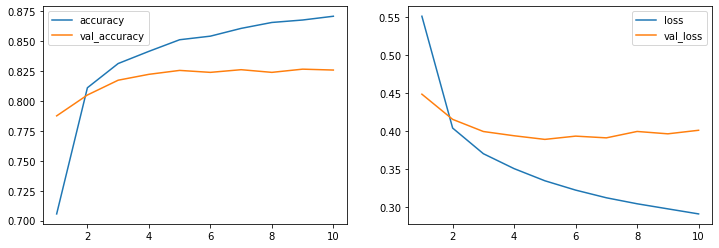

In [11]:
from util import plot_history

plot_history(history)